In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io  import loadmat

In [2]:
data = loadmat('ex4data1.mat')
X = np.hstack([np.ones([5000,1]), data['X']])
#X.shape
y=data['y']
y.shape

(5000, 1)

In [6]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))
sigmoid(0)

0.5

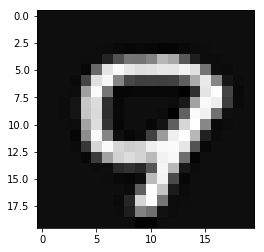

In [7]:
def showOne(x):
    img = x.reshape([20,20]).T
    plt.imshow(img, cmap='gray')
    plt.show()
showOne(data['X'][4999])

In [8]:
def onehot(y):
    y = np.where(y==10,0,y) # replace 10 with 0
    y_oh = np.zeros([5000,10])
    y_oh[np.arange(5000), y] = 1
    return y_oh
y_oh = onehot(y.reshape(-1))

In [9]:
y_oh[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
#X : 5000*401
def fp(theta1, theta2,X):
    #theta1 : 25*401
    # X.T   : 401 * 5000
    # a2    : 5000 *25
    a2 = sigmoid(theta1.dot(X.T)).T
    
    #theta2 : 10*26
    # a2    : 5000 * 25
    # a2A   : 5000 * 26
    a2A = np.hstack([np.ones([5000,1 ]), a2])
    print ("a2A --->", a2A.shape)
    
    # a3    : 5000 * 10
    a3 = sigmoid (a2A.dot(theta2.T))
    
    return a2,a3
    

In [34]:
t1 = np.array([[2],[2],[2],[2],[2],])

array([[1],
       [2],
       [2],
       [2],
       [2],
       [2]])

In [85]:
#X : 1*401
def fp1(theta1, theta2,X):
    #theta1 : 25*401
    # X.T   : 401 * 1
    # a2    : 1 *25
    X = X.reshape([401,-1])
    print('X.shape',X.shape)
    a2 = sigmoid(theta1.dot(X))
    
    #theta2 : 10*26
    # a2    : 25 * 1
    # a2A   : 26 * 1
    a2A = np.vstack([1,a2])
    # a2A   : 1 * 26
    a2A = a2A.T
    print ("a2A --->", a2A.shape)
    
    # a3    : 1 * 10   {(1*26) . (26*10)}
    a3 = sigmoid (a2A.dot(theta2.T))
    
    print('a3.shape', a3.shape)
    return a2A,a3
    

In [40]:
def cost(theta,X , y):
    theta1 = theta[0:10025].reshape([25,401])
    theta2 = theta[10025:10285].reshape([10,26])
    a2,a3 = fp(theta1, theta2, X)
    
    errs = 0
    for i in range(5000):
        #a3[i] : [10]
        #h     : [10,1]
        #y[i]  : [10]
        h = a3[i].reshape(-1, 1)
        e1 = y[i].dot(np.log(h))
        e2 = (1-y[i]).dot(np.log(1-h))
        errs =errs + e1 + e2
        regulTerm =  1/2 * 1/5000 * np.sum(np.square(theta))
        return (1/5000) * errs + regulTerm

In [41]:
initTheta = np.zeros([10285])
a22, a33 = cost(initTheta,X , y)

a2A ---> (5000, 26)


ValueError: shapes (1,) and (10,1) not aligned: 1 (dim 0) != 10 (dim 0)

In [13]:
# .dot & *
t1=np.array([[1,2],[3,4]])
t2=np.array([[2,2],[2,2]])
print(t1.dot(t2))
print(t1*t2)

[[ 6  6]
 [14 14]]
[[2 4]
 [6 8]]


# Cost Function:
<img width = '400' src = "https://work.alibaba-inc.com/aliwork_tfs/g01_alibaba-inc_com/tfscom/TB1.r_RagMPMeJjy1XbXXcwxVXa.tfsprivate.png"/>

In [18]:
#without for loop
def cost2(theta,X , y):
    theta1 = theta[0:10025].reshape([25,401])     #10025 (401*25)
    theta2 = theta[10025:10285].reshape([10,26])  #260   ( 10*26)
    a2,a3 = fp(theta1, theta2, X)
    
    print('-----------------------------------------------------------------')
    print('a3.shape---->',a3.shape)
    print('y_oh.shape-->',y_oh.shape)
    e1 = np.sum(y_oh * ( np.log(a3) ), axis=1)
    
    e2 = np.sum((1-y_oh) * ( np.log(1-a3) ), axis=1)
    print(e2.shape)
    errs = 0

    #a3 : [5000,10]
    #h  : [5000,10]
    #y  : [5000,10]

    errs =errs + np.sum(e1) + np.sum(e2)

    regulTerm =  1/2 * 1/5000 * np.sum(np.square(theta))
    return (1/5000) * errs + regulTerm

In [19]:
cs = cost2(initTheta,X , y)
print('-----------------------------------------------------------------')
print(cs)

a2A ---> (5000, 26)
-----------------------------------------------------------------
a3.shape----> (5000, 10)
y_oh.shape--> (5000, 10)
(5000,)
-----------------------------------------------------------------
-6.931471805599455


<img width="400" src="http://7xrrje.com1.z0.glb.clouddn.com/screenshot_156.png"/>

In [30]:
randomTheta = np.random.uniform(-0.5,0.5,(10285))
print (randomTheta.shape)

(10285,)


In [131]:
# theta: 10285
# X    : 401    only 1 image here
# y    :  10    only 1 image here
def bp(theta, X,y):
    theta1 = theta[0:10025].reshape([25,401])     #10025 (401*25)
    theta2 = theta[10025:10285].reshape([10,26])  #260   ( 10*26)
    a2,a3 = fp1(theta1, theta2, X)  
    #print('a2-------------->',a2.shape)
    delta3 = (a3 - y).T   # [10, 1]
    #print('delta3---------->',delta3.shape)
    d2 = theta2.T.dot(delta3) # [26*10] . [10*1]
    g2 = (a2 * (1-a2)).T
    delta2 = d2 * g2
    #print(d2.shape)
    #print(g2.shape)
    #print('delta2---------->',delta2.shape)
    
    
    #STEP E
    Delt2 = delta3.dot(a2)  #[10*1] . [1*26] = (10, 26)
    #print('Delt2---------->',Delt2.shape)
    Delt1 = delta2.dot(X.reshape([-1,401])) #[26*1] . [1*401] =(26, 401)
    #print('Delt1---------->',Delt1.shape) 
    return Delt1, Delt2
    

In [132]:
print('a' + '\t' + 'b')

a	b


In [133]:
# theta: 10285
# X    : 5000* 401    only 1 image here
# y    : 5000* 10     only 1 image here
def BP(theta, X, y):
    theta1 = theta[0:10025].reshape([25,401])     #10025 (401*25)
    theta2 = theta[10025:10285].reshape([10,26])  #260   ( 10*26)
    
    Del1 = np.zeros([26, 401])
    Del2 = np.zeros([10, 26])
    
    for i in range(X.shape[0]):
        Delta1, Delta2 = bp(theta, X[i],y[i])
        
        Del1 = D1 + Delta1 
        Del2 = D2 + Delta2 
        print(str(Delta1),'\t', str(D1))
    
    D1 = (1/5000) * Del1 + reg*theta1 #todo: remove reg terms for bias weights... (Theta1/1,0) <-------- 0
    D2 = (1/5000) * Del2 + reg*theta2
    
BP(randomTheta,X,y_oh)

X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.02579747  0.          0.         ...  0.          0.
   0.        ]
 [-0.00692518  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.09373701  0.          0.         ...  0.          0.
   0.        ]
 [ 0.0325604   0.          0.         ...  0.          0.
   0.        ]
 [ 0.04745891  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.02579747  0.          0.         ...  0.          0.
   0.        ]
 [-0.00692518  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.09373701  0.          0.         ...  0.          0.
   0.        ]
 [ 0.0325604   0.          0.         ...  0.          0.
 

a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.04815706  0.          0.         ...  0.          0.
   0.        ]
 [-0.05936627  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.0761451   0.          0.         ...  0.          0.
   0.        ]
 [ 0.01909383  0.          0.         ...  0.          0.
   0.        ]
 [ 0.08173542  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.7436781   0.          0.         ...  0.          0.
   0.        ]
 [-1.26495688  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 3.01014705  0.          0.         ...  0.          0.
   0.        ]
 [ 0.56276864  0.          0.         ...  0.          0.
   0.        ]
 [ 2.28223958  0.   

a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00104601  0.          0.         ...  0.          0.
   0.        ]
 [-0.00117692  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.07722577  0.          0.         ...  0.          0.
   0.        ]
 [ 0.02051606  0.          0.         ...  0.          0.
   0.        ]
 [ 0.01543887  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.14684648e+00  0.00000000e+00  0.00000000e+00 ...  2.84819850e-05
   0.00000000e+00  0.00000000e+00]
 [-3.40515145e+00  0.00000000e+00  0.00000000e+00 ...  2.27704999e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 8.37623770e+00  0.00000000e+00  0.00000000e+00 ...

a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.02550322  0.          0.         ...  0.          0.
   0.        ]
 [-0.01080505  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.08876393  0.          0.         ...  0.          0.
   0.        ]
 [ 0.0199392   0.          0.         ...  0.          0.
   0.        ]
 [ 0.02098303  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.55744081e+00  0.00000000e+00  0.00000000e+00 ...  2.84819850e-05
   0.00000000e+00  0.00000000e+00]
 [-6.33950526e+00  0.00000000e+00  0.00000000e+00 ...  2.27704999e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.41465698e+01  0.00000000e+00  0.00000000e+00 ... -4.89036989e-04
   0.00000000e+00

X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.02859809  0.          0.         ...  0.          0.
   0.        ]
 [-0.03387626  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.07957537  0.          0.         ...  0.          0.
   0.        ]
 [ 0.00540201  0.          0.         ...  0.          0.
   0.        ]
 [ 0.06706449  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.29032631e+00  0.00000000e+00  0.00000000e+00 ...  2.84819850e-05
   0.00000000e+00  0.00000000e+00]
 [-9.34068204e+00  0.00000000e+00  0.00000000e+00 ...  2.27704999e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.03802587e+01  0.00000000e+00  0

delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.01558568  0.          0.         ...  0.          0.
   0.        ]
 [-0.02905398  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.0410246   0.          0.         ...  0.          0.
   0.        ]
 [ 0.0065851   0.          0.         ...  0.          0.
   0.        ]
 [ 0.05543995  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.72295512e+00  0.00000000e+00  0.00000000e+00 ...  2.84819850e-05
   0.00000000e+00  0.00000000e+00]
 [-1.24806588e+01  0.00000000e+00  0.00000000e+00 ...  2.27704999e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.59202494e+01  0.00000000e+00  0.00000000e+00 ... -4.89036989e-04
   0.00000000e+00  0.00000000e+00]
 [ 4.93691986e+00  0.00000000e+00  0.00000000e+00 

a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.04152123  0.          0.         ...  0.          0.
   0.        ]
 [-0.02434876  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.09248145  0.          0.         ...  0.          0.
   0.        ]
 [ 0.00228716  0.          0.         ...  0.          0.
   0.        ]
 [ 0.08235632  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.33707056e+00  0.00000000e+00  0.00000000e+00 ...  2.84819850e-05
   0.00000000e+00  0.00000000e+00]
 [-1.56520732e+01  0.00000000e+00  0.00000000e+00 ...  2.27704999e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.17231057e+01  0.00000000e+00  0.00000000e+00 ... -4.89036989e-04


a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.02269854  0.          0.         ...  0.          0.
   0.        ]
 [-0.07468366  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00522654  0.          0.         ...  0.          0.
   0.        ]
 [-0.08330655  0.          0.         ...  0.          0.
   0.        ]
 [-0.0105435   0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.10746140e+00  0.00000000e+00  0.00000000e+00 ...  2.84819850e-05
   0.00000000e+00  0.00000000e+00]
 [-1.97807703e+01  0.00000000e+00  0.00000000e+00 ...  2.27704999e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.33965448e+01  0.00000000e+00  0.00000000e+00 ...

delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00091375  0.          0.         ...  0.          0.
   0.        ]
 [-0.06894481  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00680069  0.          0.         ...  0.          0.
   0.        ]
 [-0.0868732   0.          0.         ...  0.          0.
   0.        ]
 [-0.03391413  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.11428708e+00  0.00000000e+00  0.00000000e+00 ...  2.84819850e-05
   0.00000000e+00  0.00000000e+00]
 [-2.48870531e+01  0.00000000e+00  0.00000000e+00 ...  2.27704999e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.27056944e+01  0.00000000e+00  0.00000000e+00 ... -4.89036989e-04
   0.00000000e+00  0.00000000e+00]
 [-4.23910208e+00  0.00000000e+00  0.00000000e+00 

(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00027203  0.          0.         ...  0.          0.
   0.        ]
 [-0.06253578  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.00063442  0.          0.         ...  0.          0.
   0.        ]
 [-0.06617151  0.          0.         ...  0.          0.
   0.        ]
 [-0.02847426  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.10000554e+00  0.00000000e+00  0.00000000e+00 ...  2.84819850e-05
   0.00000000e+00  0.00000000e+00]
 [-2.94486436e+01  0.00000000e+00  0.00000000e+00 ...  2.27704999e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.23958623e+01  0.00000000e+00  0.00000000e+00 ... -4.89036989e-04
   0.00000000e+00  0.00000000e+00]
 [-1.05738895e+01  0.00000000e+00  0.00000

a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.0006646   0.          0.         ...  0.          0.
   0.        ]
 [-0.03963516  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00687547  0.          0.         ...  0.          0.
   0.        ]
 [-0.07842755  0.          0.         ...  0.          0.
   0.        ]
 [-0.04436201  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.77276979e+00  0.00000000e+00  0.00000000e+00 ...  2.84819850e-05
   0.00000000e+00  0.00000000e+00]
 [-3.51473367e+01  0.00000000e+00  0.00000000e+00 ...  2.27704999e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.18046996e+01  0.00000000e+00  0.00000000e+00 ... -4.89036989e-04
   0.00000000e+00

Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00752576  0.          0.         ...  0.          0.
   0.        ]
 [-0.06845113  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.01861007  0.          0.         ...  0.          0.
   0.        ]
 [-0.07840007  0.          0.         ...  0.          0.
   0.        ]
 [-0.01995829  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.60516770e+00  0.00000000e+00  0.00000000e+00 ...  2.84819850e-05
   0.00000000e+00  0.00000000e+00]
 [-3.95415898e+01  0.00000000e+00  0.00000000e+00 ...  2.27704999e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.13767633e+01  0.00000000e+00  0.00000000e+00 ... -4.89036989e-04
   0.00000000e+00  0.00000000e+00]
 [-2.35690079e+01  0.00000000e+00  0.00000000e+00 ... -1.81678447e-04
   0.0

delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.01935784  0.          0.         ...  0.          0.
   0.        ]
 [-0.06226259  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00751991  0.          0.         ...  0.          0.
   0.        ]
 [-0.08714852  0.          0.         ...  0.          0.
   0.        ]
 [-0.00771443  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.69631052e+00  0.00000000e+00  0.00000000e+00 ...  5.12749142e-05
   0.00000000e+00  0.00000000e+00]
 [-4.53270562e+01  0.00000000e+00  0.00000000e+00 ...  1.70888776e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.07087962e+01  0.00000000e+00  0.00000000e+00 ... -4.94117063e-04
   0.00000000e+00  0.00000000e+00]
 [-3.076

Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00161562  0.          0.         ...  0.          0.
   0.        ]
 [-0.00409487  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.02889188  0.          0.         ...  0.          0.
   0.        ]
 [ 0.04492095  0.          0.         ...  0.          0.
   0.        ]
 [-0.06915021  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.38955000e+00  0.00000000e+00  0.00000000e+00 ...  5.12749142e-05
   0.00000000e+00  0.00000000e+00]
 [-4.87486095e+01  0.00000000e+00  0.00000000e+00 ...  1.70888776e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.93888189e+01  0.00000000e+00  0.00000000e+00 ... -4.94117063e-04
   0.00000000e+00  0.00000000e+00]
 [-3.31252989e+01  0.00000000e+00  0.00000000e+00 ... -2.98909311e-04
   0.00000000e+00  0.00000000e+0

a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.05369095e-05  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.90775448e-02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-5.56824260e-03  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.66252440e-02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.34055316e-02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.51909514e+00  0.00000000e+00  0.00000000e+00 ...  5.12749142e-05
   0.0

a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00058666  0.          0.         ...  0.          0.
   0.        ]
 [-0.01096575  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.03236659  0.          0.         ...  0.          0.
   0.        ]
 [ 0.05111562  0.          0.         ...  0.          0.
   0.        ]
 [-0.01600902  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.59762294e+00  0.00000000e+00  0.00000000e+00 ...  5.04968149e-05
   0.00000000e+00  0.00000000e+00]
 [-5.24934592e+01  0.00000000e+00  0.00000000e+00 ...  1.13087984e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.46043944e+01  0.00000000e+00  0.00000000e+00 ... -5.40473533e-04
   0.00000000e+00

delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00134237  0.          0.         ...  0.          0.
   0.        ]
 [-0.01900103  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.03016472  0.          0.         ...  0.          0.
   0.        ]
 [ 0.02336626  0.          0.         ...  0.          0.
   0.        ]
 [-0.04853666  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.64309704e+00  0.00000000e+00  0.00000000e+00 ...  3.65336275e-05
   1.33911450e-06  0.00000000e+00]
 [-5.44666605e+01  0.00000000e+00  0.00000000e+00 ... -7.90766721e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 2.27900489e+01  0.00000000e+00  0.00000000e+00 ... -6.90676311e-04
   1.49762535e-06  0.00000000e+00]
 [-2.632

a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00334437  0.          0.         ...  0.          0.
   0.        ]
 [-0.02826745  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.04480048  0.          0.         ...  0.          0.
   0.        ]
 [ 0.05854023  0.          0.         ...  0.          0.
   0.        ]
 [-0.02076979  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.64221492e+00  0.00000000e+00  0.00000000e+00 ...  3.61165886e-05
   1.33911450e-06  0.00000000e+00]
 [-5.60718231e+01  0.00000000e+00  0.00000000e+00 ... -8.29177304e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 2.04974545e+01  0.00000000e+00  0.00000000e+00 ... -6.99266961e-04
   1.49762535e-06

X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00429925  0.          0.         ...  0.          0.
   0.        ]
 [-0.04339569  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00711055  0.          0.         ...  0.          0.
   0.        ]
 [ 0.02157464  0.          0.         ...  0.          0.
   0.        ]
 [-0.03370508  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.74188209e+00  0.00000000e+00  0.00000000e+00 ...  3.58060665e-05
   1.33911450e-06  0.00000000e+00]
 [-5.79697929e+01  0.00000000e+00  0.00000000e+00 ... -8.44615078e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 1.86259612e+01  0.00000000e+00  0

Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00355035  0.          0.         ...  0.          0.
   0.        ]
 [-0.06255     0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.02232412  0.          0.         ...  0.          0.
   0.        ]
 [ 0.0212833   0.          0.         ...  0.          0.
   0.        ]
 [ 0.00913605  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.35783185e+00  0.00000000e+00  0.00000000e+00 ...  3.59246506e-05
   1.33911450e-06  0.00000000e+00]
 [-6.16356429e+01  0.00000000e+00  0.00000000e+00 ... -7.98633041e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 1.76765958e+01  0.00000000e+00  0.00000000e+00 ... -6.73885385e-04
   1.49762535e-06  0.00000000e+00]
 [-1.62883036e+01  0.00000000e+00  0.00000000e+00 ...  5.24344301e-04
  -6.70419360e-05  0.00000000e+0

delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00023615  0.          0.         ...  0.          0.
   0.        ]
 [-0.08743176  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.00232997  0.          0.         ...  0.          0.
   0.        ]
 [ 0.07342902  0.          0.         ...  0.          0.
   0.        ]
 [ 0.03474542  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.63179151e+00  0.00000000e+00  0.00000000e+00 ...  3.59246506e-05
   1.33911450e-06  0.00000000e+00]
 [-6.54093247e+01  0.00000000e+00  0.00000000e+00 ... -7.98633041e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 1.85817912e+01  0.00000000e+00  0.00000000e+00 ... -6.73885385e-04
   1.49762535e-06  0.00000000e+00]
 [-7.911

a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.06187422  0.          0.         ...  0.          0.
   0.        ]
 [-0.01941589  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.01719459  0.          0.         ...  0.          0.
   0.        ]
 [ 0.05187418  0.          0.         ...  0.          0.
   0.        ]
 [ 0.04391827  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.17817745e+00  0.00000000e+00  0.00000000e+00 ...  3.59246506e-05
   1.33911450e-06  0.00000000e+00]
 [-7.00485712e+01  0.00000000e+00  0.00000000e+00 ... -7.98633041e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 1.96139708e+01  0.00000000e+00  0.00000000e+00 ... -6.73885385e-04


X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00178622  0.          0.         ...  0.          0.
   0.        ]
 [-0.07738832  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.04952116  0.          0.         ...  0.          0.
   0.        ]
 [ 0.10040765  0.          0.         ...  0.          0.
   0.        ]
 [ 0.0063469   0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.72782335e+00  0.00000000e+00  0.00000000e+00 ...  3.59246506e-05
   1.33911450e-06  0.00000000e+00]
 [-7.54926529e+01  0.00000000e+00  0.00000000e+00 ... -7.98633041e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 2.09405532e+01  0.00000000e+00  0

   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-9.11263453e+00  0.00000000e+00  0.00000000e+00 ...  3.59246506e-05
   1.33911450e-06  0.00000000e+00]
 [-7.94932361e+01  0.00000000e+00  0.00000000e+00 ... -7.98633041e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 2.20611613e+01  0.00000000e+00  0.00000000e+00 ... -6.73885385e-04
   1.49762535e-06  0.00000000e+00]
 [ 1.93117365e+01  0.00000000e+00  0.00000000e+00 ...  5.24344301e-04
  -6.70419360e-05  0.00000000e+00]
 [ 7.18949498e+00  0.00000000e+00  0.00000000e+00 ... -1.14886908e-03
   3.47493676e-05  0.00000000e+00]]
X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00274676  0.          0.         ...  0.          0.
   0.        ]
 [

   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.06387127e+01  0.00000000e+00  0.00000000e+00 ...  3.59246506e-05
   1.33911450e-06  0.00000000e+00]
 [-8.43183108e+01  0.00000000e+00  0.00000000e+00 ... -7.98633041e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 2.30652832e+01  0.00000000e+00  0.00000000e+00 ... -6.73885385e-04
   1.49762535e-06  0.00000000e+00]
 [ 2.88692667e+01  0.00000000e+00  0.00000000e+00 ...  5.24344301e-04
  -6.70419360e-05  0.00000000e+00]
 [ 9.94231060e+00  0.00000000e+00  0.00000000e+00 ... -1.14886908e-03
   3.47493676e-05  0.00000000e+00]]
X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.02807576  0.          0.         ...  0.          0.
   0.        ]
 [

delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.0486738   0.          0.         ...  0.          0.
   0.        ]
 [-0.01230526  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.12183854  0.          0.         ...  0.          0.
   0.        ]
 [ 0.03259027  0.          0.         ...  0.          0.
   0.        ]
 [-0.03088158  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.03501554e+01  0.00000000e+00  0.00000000e+00 ...  3.59246506e-05
   1.33911450e-06  0.00000000e+00]
 [-8.72772666e+01  0.00000000e+00  0.00000000e+00 ... -7.98633041e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 2.70901725e+01  0.00000000e+00  0.00000000e+00 ... -6.73885385e-04
   1.49762535e-06  0.00000000e+00]
 [ 3.49549419e+01  0.00000000e+00  0.00000000e+00 

   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.23786374e+00  0.00000000e+00  0.00000000e+00 ...  3.59246506e-05
   1.33911450e-06  0.00000000e+00]
 [-8.94199574e+01  0.00000000e+00  0.00000000e+00 ... -7.98633041e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 3.39310284e+01  0.00000000e+00  0.00000000e+00 ... -6.73885385e-04
   1.49762535e-06  0.00000000e+00]
 [ 3.80963748e+01  0.00000000e+00  0.00000000e+00 ...  5.24344301e-04
  -6.70419360e-05  0.00000000e+00]
 [ 5.58046093e+00  0.00000000e+00  0.00000000e+00 ... -1.14886908e-03
   3.47493676e-05  0.00000000e+00]]
X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.04853599  0.          0.         ...  0.          0.
   0.        ]
 [

X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00179704  0.          0.         ...  0.          0.
   0.        ]
 [-0.03400636  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.11220579  0.          0.         ...  0.          0.
   0.        ]
 [ 0.03668808  0.          0.         ...  0.          0.
   0.        ]
 [-0.02140344  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.26750533e+00  0.00000000e+00  0.00000000e+00 ...  3.59246506e-05
   1.33911450e-06  0.00000000e+00]
 [-9.16274288e+01  0.00000000e+00  0.00000000e+00 ... -7.98633041e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 4.25657194e+01  0.00000000e+00  0

(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.01648445  0.          0.         ...  0.          0.
   0.        ]
 [-0.02610663  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.13623479  0.          0.         ...  0.          0.
   0.        ]
 [ 0.03459199  0.          0.         ...  0.          0.
   0.        ]
 [-0.05872935  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.51594593e+00  0.00000000e+00  0.00000000e+00 ...  3.59246506e-05
   1.33911450e-06  0.00000000e+00]
 [-9.39161751e+01  0.00000000e+00  0.00000000e+00 ... -7.98633041e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 5.06044227e+01  0.00000000e+00  0.00000000e+00 ... -6.73885385e-04
   1.49762535e-06  0.00000000e+00]
 [ 4.37499599e+01  0.00000000e+00  0.00000

   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.35018838e+00  0.00000000e+00  0.00000000e+00 ...  3.59246506e-05
   1.33911450e-06  0.00000000e+00]
 [-9.59482225e+01  0.00000000e+00  0.00000000e+00 ... -7.98633041e-04
   8.59214516e-05  0.00000000e+00]
 ...
 [ 5.77276417e+01  0.00000000e+00  0.00000000e+00 ... -6.73885385e-04
   1.49762535e-06  0.00000000e+00]
 [ 4.66058227e+01  0.00000000e+00  0.00000000e+00 ...  5.24344301e-04
  -6.70419360e-05  0.00000000e+00]
 [-6.77296659e+00  0.00000000e+00  0.00000000e+00 ... -1.14886908e-03
   3.47493676e-05  0.00000000e+00]]
X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00249668  0.          0.         ...  0.          0.
   0.        ]
 [

Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.08431468  0.          0.         ...  0.          0.
   0.        ]
 [-0.03584435  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.1093686   0.          0.         ...  0.          0.
   0.        ]
 [ 0.03902239  0.          0.         ...  0.          0.
   0.        ]
 [-0.01836118  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.52340316e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-9.84681217e+01  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 6.55362553e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 4.96176157e+01  0.00000000e+00  0.00000000e+00 ...  5.65821129e-04
  -6.6

a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00570993  0.          0.         ...  0.          0.
   0.        ]
 [-0.03632186  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.03267703  0.          0.         ...  0.          0.
   0.        ]
 [ 0.0629145   0.          0.         ...  0.          0.
   0.        ]
 [ 0.11333599  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.03517107e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.02433746e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 7.05491342e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04


delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00727102  0.          0.         ...  0.          0.
   0.        ]
 [-0.02130427  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.0054177   0.          0.         ...  0.          0.
   0.        ]
 [ 0.05509345  0.          0.         ...  0.          0.
   0.        ]
 [ 0.06712953  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.86810378e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.09084968e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 7.27100666e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 5.69451759e+01  0.00000000e+00  0.00000000e+00 

a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00235481  0.          0.         ...  0.          0.
   0.        ]
 [-0.09942438  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.00675877  0.          0.         ...  0.          0.
   0.        ]
 [ 0.03720307  0.          0.         ...  0.          0.
   0.        ]
 [ 0.11490428  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.70790418e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.15680511e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 7.48504674e+01  0.00000000e+00  0.00000000e+00 ...

   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.71115810e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.22154447e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 7.73624498e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 6.44508673e+01  0.00000000e+00  0.00000000e+00 ...  5.65821129e-04
  -6.61364188e-05  0.00000000e+00]
 [ 1.91835110e+01  0.00000000e+00  0.00000000e+00 ... -1.25538810e-03
   3.24238572e-05  0.00000000e+00]]
X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00846688  0.          0.         ...  0.          0.
   0.        ]
 [

a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00616697  0.          0.         ...  0.          0.
   0.        ]
 [-0.09546159  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.00684901  0.          0.         ...  0.          0.
   0.        ]
 [ 0.05300157  0.          0.         ...  0.          0.
   0.        ]
 [ 0.08193575  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.45097936e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.28740849e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 7.93206352e+01  0.00000000e+00  0.00000000e+00 ...

Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00840265  0.          0.         ...  0.          0.
   0.        ]
 [-0.1165851   0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.00758713  0.          0.         ...  0.          0.
   0.        ]
 [ 0.02996912  0.          0.         ...  0.          0.
   0.        ]
 [ 0.15757737  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.42934413e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.35097841e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 8.20198284e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 7.25554700e+01  0.00000000e+00  0.00000000e+00 ...  5.65821129e-04
  -6.61364188e-05  0.00000000e+0

a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.03967795  0.          0.         ...  0.          0.
   0.        ]
 [-0.15014533  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.02806555  0.          0.         ...  0.          0.
   0.        ]
 [ 0.04707168  0.          0.         ...  0.          0.
   0.        ]
 [ 0.00184546  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.98841070e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.40572841e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 8.38517469e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04


a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.0035924   0.          0.         ...  0.          0.
   0.        ]
 [-0.0140963   0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.00655247  0.          0.         ...  0.          0.
   0.        ]
 [ 0.08050258  0.          0.         ...  0.          0.
   0.        ]
 [-0.0034263   0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.27562545e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.46758254e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 8.56465072e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04


(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00276802  0.          0.         ...  0.          0.
   0.        ]
 [-0.08658937  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.06634501  0.          0.         ...  0.          0.
   0.        ]
 [ 0.04706962  0.          0.         ...  0.          0.
   0.        ]
 [-0.0144024   0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.33448154e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.52929051e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 8.71846364e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 8.62916358e+01  0.00000000e+00 

Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.03589945  0.          0.         ...  0.          0.
   0.        ]
 [-0.11827798  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.02521387  0.          0.         ...  0.          0.
   0.        ]
 [ 0.06838454  0.          0.         ...  0.          0.
   0.        ]
 [-0.01651387  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.03004171e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.59589557e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 8.87168827e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 9.12579540e+01  0.00000000e+00  0.00000000e+00 ...  5.65821129e-04
  -6.61364188e-05  0.00000000e+0

Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00526555  0.          0.         ...  0.          0.
   0.        ]
 [-0.05299841  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.01171263  0.          0.         ...  0.          0.
   0.        ]
 [ 0.03491055  0.          0.         ...  0.          0.
   0.        ]
 [-0.02121861  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.46284058e-01  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.65523712e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 9.05496295e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 9.50914318e+01  0.00000000e+00  0.00000000e+00 ...  5.65821129e-04
  -6.6

a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00263637  0.          0.         ...  0.          0.
   0.        ]
 [-0.11835512  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.00284138  0.          0.         ...  0.          0.
   0.        ]
 [ 0.04510822  0.          0.         ...  0.          0.
   0.        ]
 [-0.01367747  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.59928139e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.72211308e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 9.19405783e+01  0.00000000e+00  0.00000000e+00 ...

   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.38501066e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.82837007e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 9.22263001e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 1.00354573e+02  0.00000000e+00  0.00000000e+00 ...  5.65821129e-04
  -6.61364188e-05  0.00000000e+00]
 [ 4.17473735e+01  0.00000000e+00  0.00000000e+00 ... -1.25538810e-03
   3.24238572e-05  0.00000000e+00]]
X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00462996  0.          0.         ...  0.          0.
   0.        ]
 [

   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.51285550e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-1.97468371e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 9.10115913e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 9.88238081e+01  0.00000000e+00  0.00000000e+00 ...  5.65821129e-04
  -6.61364188e-05  0.00000000e+00]
 [ 5.17879612e+01  0.00000000e+00  0.00000000e+00 ... -1.25538810e-03
   3.24238572e-05  0.00000000e+00]]
X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.08292703  0.          0.         ...  0.          0.
   0.        ]
 [

(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.02255628  0.          0.         ...  0.          0.
   0.        ]
 [-0.21460803  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00498828  0.          0.         ...  0.          0.
   0.        ]
 [-0.02782044  0.          0.         ...  0.          0.
   0.        ]
 [ 0.09598916  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.40434904e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-2.11611626e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 9.00350585e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 9.70914772e+01  0.00000000e+00 

delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.01688973  0.          0.         ...  0.          0.
   0.        ]
 [-0.08382844  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.01731896  0.          0.         ...  0.          0.
   0.        ]
 [-0.04590087  0.          0.         ...  0.          0.
   0.        ]
 [ 0.12564222  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.27693884e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-2.25889777e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 8.90080489e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 9.51580343e+01  0.00000000e+00  0.00000000e+00 

X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00782034  0.          0.         ...  0.          0.
   0.        ]
 [-0.228956    0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00711873  0.          0.         ...  0.          0.
   0.        ]
 [-0.04274028  0.          0.         ...  0.          0.
   0.        ]
 [ 0.12079648  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.90525518e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-2.41592809e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 8.80358726e+01  0.00000000e+00  0

Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.0019948   0.          0.         ...  0.          0.
   0.        ]
 [-0.17870765  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00655552  0.          0.         ...  0.          0.
   0.        ]
 [-0.02853275  0.          0.         ...  0.          0.
   0.        ]
 [ 0.10171199  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.18442888e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-2.55638772e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 8.70716725e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 9.19175259e+01  0.00000000e+00  0.00000000e+00 ...  5.65821129e-04
  -6.6

delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00962244  0.          0.         ...  0.          0.
   0.        ]
 [-0.06703231  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.05381386  0.          0.         ...  0.          0.
   0.        ]
 [ 0.08870014  0.          0.         ...  0.          0.
   0.        ]
 [ 0.02846841  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.71376650e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-2.69528562e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 8.41076073e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 9.246

Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00225694  0.          0.         ...  0.          0.
   0.        ]
 [-0.07813119  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.0235541   0.          0.         ...  0.          0.
   0.        ]
 [ 0.06450153  0.          0.         ...  0.          0.
   0.        ]
 [ 0.01263267  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.67677355e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-2.79470256e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 7.91347771e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 9.78617789e+01  0.00000000e+00  0.00000000e+00 ...  5.65821129e-04
  -6.61364188e-05  0.00000000e+0

delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00735808  0.          0.         ...  0.          0.
   0.        ]
 [-0.10002786  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.0507666   0.          0.         ...  0.          0.
   0.        ]
 [ 0.06318162  0.          0.         ...  0.          0.
   0.        ]
 [ 0.01985236  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.05987772e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-2.87053288e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 7.51765036e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 1.02346103e+02  0.00000000e+00  0.00000000e+00 

(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.02329695  0.          0.         ...  0.          0.
   0.        ]
 [-0.09321606  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.06009291  0.          0.         ...  0.          0.
   0.        ]
 [ 0.0475011   0.          0.         ...  0.          0.
   0.        ]
 [ 0.01365531  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.95409797e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-2.96473988e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 7.03436426e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 1.07598977e+02  0.00000000e+00 

delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00184459  0.          0.         ...  0.          0.
   0.        ]
 [-0.10053852  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.06622505  0.          0.         ...  0.          0.
   0.        ]
 [ 0.07420967  0.          0.         ...  0.          0.
   0.        ]
 [ 0.03657463  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.13048859e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-3.05415105e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 6.59463193e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 1.12107274e+02  0.00000000e+00  0.00000000e+00 

delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00868939  0.          0.         ...  0.          0.
   0.        ]
 [-0.05017158  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.01994202  0.          0.         ...  0.          0.
   0.        ]
 [ 0.07292586  0.          0.         ...  0.          0.
   0.        ]
 [ 0.01679721  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.70138070e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-3.14528023e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 6.16317779e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 1.170

   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.27091751e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-3.22637248e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 5.85776942e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 1.20805063e+02  0.00000000e+00  0.00000000e+00 ...  5.65821129e-04
  -6.61364188e-05  0.00000000e+00]
 [ 1.24173168e+02  0.00000000e+00  0.00000000e+00 ... -1.25538810e-03
   3.24238572e-05  0.00000000e+00]]
X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.00113588  0.          0.         ...  0.          0.
   0.        ]
 [

Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00073097  0.          0.         ...  0.          0.
   0.        ]
 [-0.15193458  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.0117842   0.          0.         ...  0.          0.
   0.        ]
 [ 0.06438648  0.          0.         ...  0.          0.
   0.        ]
 [ 0.03953277  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.41908706e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-3.32584772e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 5.63661218e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 1.24383762e+02  0.00000000e+00  0.00000000e+00 ...  5.65821129e-04
  -6.61364188e-05  0.00000000e+0

Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.01447712  0.          0.         ...  0.          0.
   0.        ]
 [-0.15867633  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00785648  0.          0.         ...  0.          0.
   0.        ]
 [ 0.03444475  0.          0.         ...  0.          0.
   0.        ]
 [ 0.04520563  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.50397674e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-3.41588290e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 5.45903145e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 1.27579465e+02  0.00000000e+00  0.00000000e+00 ...  5.65821129e-04
  -6.61364188e-05  0.00000000e+0

a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.00164486  0.          0.         ...  0.          0.
   0.        ]
 [-0.09811992  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.05263982  0.          0.         ...  0.          0.
   0.        ]
 [ 0.02247769  0.          0.         ...  0.          0.
   0.        ]
 [ 0.03480213  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.68859352e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-3.50788072e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 5.24240696e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04


delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.0017802   0.          0.         ...  0.          0.
   0.        ]
 [-0.11627916  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.0340343   0.          0.         ...  0.          0.
   0.        ]
 [ 0.05430005  0.          0.         ...  0.          0.
   0.        ]
 [ 0.01073415  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.84491201e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-3.59202194e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 5.06499016e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 1.343

(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.0011262   0.          0.         ...  0.          0.
   0.        ]
 [-0.12843464  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.04371206  0.          0.         ...  0.          0.
   0.        ]
 [ 0.03553473  0.          0.         ...  0.          0.
   0.        ]
 [ 0.05352717  0.          0.         ...  0.          0.
   0.        ]] 	 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.03343959e+00  0.00000000e+00  0.00000000e+00 ...  1.30586732e-04
   3.40576579e-06  0.00000000e+00]
 [-3.67560764e+02  0.00000000e+00  0.00000000e+00 ... -9.05232387e-04
   8.35941873e-05  0.00000000e+00]
 ...
 [ 4.84485355e+01  0.00000000e+00  0.00000000e+00 ... -5.92537557e-04
   3.27360145e-06  0.00000000e+00]
 [ 1.37410290e+02  0.00000000e+00  0.00000

In [124]:
bp(randomTheta, X[0],y_oh[0])

X.shape (401, 1)
a2A ---> (1, 26)
a3.shape (1, 10)
a2--------------> (1, 26)
delta3----------> (10, 1)
(26, 1)
(26, 1)
delta2----------> (26, 1)
Delt2----------> (10, 26)
Delt1----------> (26, 401)


In [73]:
# test matrix * multiply
ar1 = np.array([[1,2],[3,4]])
ar2 = np.array([[1,2],[3,4]])
ar = ar1*(ar2)
print(ar)
np.sum(ar)

[[ 1  4]
 [ 9 16]]


30

30

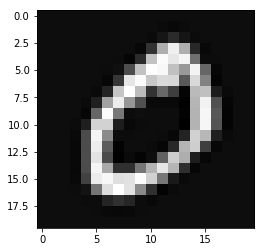

array([10], dtype=uint8)

In [64]:

x00 = data['X'][0].reshape([20,20]).T
plt.imshow(x00, cmap='gray')
plt.show()
y[0]

In [65]:
hiddensize = 25
samples = 5000
features = 400
outputClass =10

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
#hx: 5000*10
#Oy: 5000*10
#theta1: 25*401
#theta2: 10*26

def cost(theta, hX,Oy):
    errs = 0
    for i in range(5000):
        y = Oy(i) #10 hori Vec
        x = hX(i) #10 hori Vec
        vx = x.reshape(-1,1)
        e1 = -y.dot(np.log(vx))
        e2 = -(1-y).dot(np.log(1-vx))
        err = e1+e2
        errs+=err
        
        thetaAllSquare = np.square(theta)
        
        regTerms = (1/5000)*lamda * ()
    return (1/5000)*errs 

In [20]:
# FP for single sample
def ForwardPropagation(theta, X1):
    #theta1: 25*401
    theta1 = theta[:25*401].reshape([25,401])
    #theta2: 10*26
    theta2 = theta[25*401:].reshape([10,26])
    
    #X1: [401,]
    a1 = X1
    
    #z1: [25,1]
    z2 = theta1.dot(a1)
    a2 = sigmoid(z2).reshape([-1,1])
    
    
    #appending a20
    print('a2.shape--->', a2.shape)
    a2 = np.vstack([1, a2])
    
    
    z3 = theta2.dot(a2)
    a2 = sigmoid(a1).reshape([-1,1])
    print('a2.shape--->', a2.shape)
    return a2,a1 # 10*1

In [10]:
# BP for one sample
def BackPropagation(theta,X1,y):
    #theta1: 25*401
    theta1 = theta[:25*401].reshape([25,401])
    #theta2: 10*26
    theta2 = theta[25*401:].reshape([10,26])
    #X: [401,]
    a0 = X1
    
    hx,a1 = ForwardPropagation(theta, X1) [10,1]
    delta3 =  hx - y
    
    gPrime2 = a1 * (1-a1)
    delta2 = theta2.T.dot(delta2).reshape([-1,1]) * gPrime2
    
    return delta2,delta3


def gradient():
    D1 = delta2.dot(a1.T)
    D2 = delta3.dot(a2.T)
    

array([[3.],
       [4.],
       [5.],
       [6.]])

In [28]:
aaa = np.array([1,2,3,4,5]).reshape([-1,1])
bbb = np.array([1,2,3,4,5]).reshape([-1,1])
xxx = aaa*bbb
xxx * (1-xxx)

array([[   0],
       [ -12],
       [ -72],
       [-240],
       [-600]])

In [26]:
initTheta = np.zeros([10285])
X1 = X[0]
hx = ForwardPropagation(initTheta, X1)
hx

a1.shape---> (25, 1)
a2.shape---> (26, 1)


array([[0.73105858],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933],
       [0.62245933]])

In [12]:
X[0].shape

(401,)

In [ ]:
# FP for all samples
# X [5000, 401]
def ForwardPropagationAll(theta, X):
    #theta1: 25*401
    theta1 = theta[:25*401].reshape([25,401])
    #theta2: 10*26
    theta2 = theta[25*401:].reshape([10,26])
    #X: [5000,401]
    a0 = X
    #theta1: 25*401
    #z1: [5000,25]
    z1 = theta1.T.dot(X)
    a1 = sigmoid(z1)
    #appending a10
    a1 = np.hstack([np.ones([5000,1]), a1])
    #a1: [5000, 26]
    # theta2: 10*26
    #z2: [5000,10]
    z2 = theta2.T.dot(a1)
    a2 = sigmoid(a1)
    return a2 # [5000,10]